## NLP Analysis of Data Science Jobs in Ireland


In [6]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
# data path
DATA_PATH = './data'
# first & last items in list
LAST_ITEMS = -8
FIRST_ITEMS = 3


In [8]:
def read_file(file):
    """
        Reads a file from the from the directory
        Returns: list of sentences
    """
    if file == ".DS_Store":
        pass
    try:
        with open(f"{DATA_PATH}/{file}", 'r') as f:
            content = f.read()
        return content.split('\n')
    except:
        print(f"unable to read: {file} ")

In [9]:
def get_title(sentences):
    """
        get the job title and the company name
    """
    title = sentences[0]
    company = sentences[1]
    location = sentences[2]
    
    return title, company, location

In [10]:
def job_metadata(sentences):
    
    """
        The last 8 items of the sentences list are Seniority level ...
        reutrns: a dictionary of level:value
    """
    metadata_dict = {}
    keys = []
    values = []
    data = sentences[LAST_ITEMS:]
    for i in range(len(data)):
        if i % 2 == 0:
            keys.append(data[i])
        else:
            values.append(data[i])
#     for key, value in zip(keys,values):
#         metadata_dict[key] = value
    
    return list(zip(keys,values))
            

In [11]:
def get_text(sentences):
    text = sentences[FIRST_ITEMS:LAST_ITEMS]

    return text

In [12]:
job_df = pd.DataFrame(columns=["ids", "title", "company", "location",
                 "text", "seniority_level", "industry",
                 "employment_type", "job_function"])
# job_df.columns = ["ids", "title", "position", "location",
#                  "text", "seniority_level", "industry",
#                  "employment_type", "job_function"]

In [13]:

for file in os.listdir(DATA_PATH):
    if file.endswith('.DS_Store'):
        continue
    
    #print(file)
    ids = file.split("_")[0]
    sentences = read_file(file)
    title, company, location = get_title(sentences)
    details = ' '.join(get_text(sentences))
    meta_data = job_metadata(sentences)
    
    job_df = job_df.append(
        {"ids":ids,
         "title": title,
         "company": company,
         "location": location,
         "text": details,
         "seniority_level":meta_data[0][1],
         "industry":meta_data[1][1],
         "employment_type":meta_data[2][1],
         "job_function": meta_data[3][1]},
        ignore_index=True
    
    )
        
    

In [14]:
job_df

,ids,title,company,location,text,seniority_level,industry,employment_type,job_function
0,56,Software Engineer,Smartbox Group,"Dublin, County Dublin, Ireland",Department: Technology Reporting to: Software...,Associate,"Leisure, Travel & Tourism Hospitality",Full-time,Engineering Information Technology
1,21,Data Analyst,Johnson & Johnson,"Cork, County Cork, Ireland","Data Analyst, Technical Operations (Global) C...",Entry level,Medical Device Financial Services Pharmaceuticals,Full-time,Information Technology
2,34,Senior Data Engineer,Vela Games,"Dublin, County Dublin, Ireland",Vela Games is looking for a talented Senior Da...,Associate,Design Entertainment Computer Games,Full-time,Engineering
3,106,Data Analyst,Dabster,"Cork, County Cork, Ireland","Permanent Position Cork , Ireland Duties, Fu...",Entry level,Information Technology & Services Computer Sof...,Full-time,Information Technology
4,51,AIB - Data Engineer – Data and Analytics,AIB,Ireland,Posted by Caroline Donlon 2nd Senior Business ...,Mid-Senior level,Banking,Full-time,Information Technology
...,...,...,...,...,...,...,...,...,...
136,66,Data Analyst (Marketing),Azon Recruitment Group,"Dublin, County Dublin, Ireland",Posted by Laura Murphy 2nd Recruitment Consult...,Entry level,Financial Services Information Technology & Se...,Full-time,Analyst Information Technology Marketing
137,71,Data Engineer,Verizon Connect,"Dublin City, County Dublin, Ireland",Posted by Ian Cummins 2nd Senior Technical Rec...,Mid-Senior level,Information Technology & Services,Full-time,Information Technology
138,17,Data Engineer - AI Analytics - Cork,Jefferson Frank,"Cork, County Cork, Ireland",Data Engineer Cork - Flexible Remote Working ...,Entry level,Information Technology & Services Staffing & R...,Full-time,Information Technology
139,29,Data Scientist - Remote,Reperio Human Capital,"Cork, County Cork, Ireland",(Artificial Intelligence) Exciting new opport...,Entry level,Information Technology & Services Computer Sof...,Full-time,Engineering Information Technology


In [15]:
job_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ids              141 non-null    object
 1   title            141 non-null    object
 2   company          141 non-null    object
 3   location         141 non-null    object
 4   text             141 non-null    object
 5   seniority_level  141 non-null    object
 6   industry         141 non-null    object
 7   employment_type  141 non-null    object
 8   job_function     141 non-null    object
dtypes: object(9)
memory usage: 10.0+ KB


In [16]:
job_df.to_csv("./text_to_df/job_df.csv", index=False)

In [17]:
# creating a word cloud for job titles
stopwords = set(STOPWORDS)
def create_wc(text, title, max_words=30, max_font_size=50, stopwords=stopwords):
    cloud = WordCloud(stopwords=stopwords, max_words=max_words, max_font_size=max_words, background_color='white').generate(text)
    plt.figure(figsize=(15,20))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontdict={'fontsize':40})
    plt.savefig(f"./graphs/{title}.png")
    plt.show()
    

In [18]:
text = '\n'.join(job_df['title'].values)

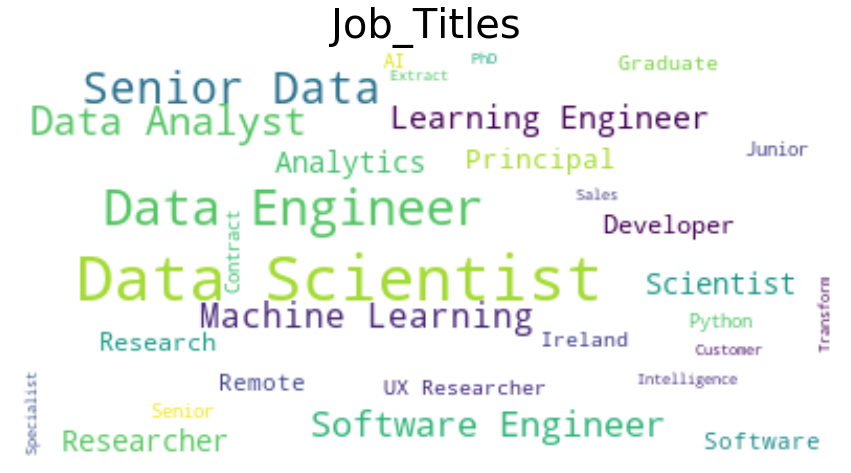

In [19]:
create_wc(text, "Job_Titles")

In [20]:
job_df.text

0      Department: Technology  Reporting to: Software...
1      Data Analyst, Technical Operations (Global)  C...
2      Vela Games is looking for a talented Senior Da...
3      Permanent Position  Cork , Ireland  Duties, Fu...
4      Posted by Caroline Donlon 2nd Senior Business ...
                             ...                        
136    Posted by Laura Murphy 2nd Recruitment Consult...
137    Posted by Ian Cummins 2nd Senior Technical Rec...
138    Data Engineer  Cork - Flexible Remote Working ...
139    (Artificial Intelligence)  Exciting new opport...
140    Research Centre  Insight SFI Research Centre f...
Name: text, Length: 141, dtype: object

In [21]:
all_details = '\n'.join(job_df['text'].values)
len(all_details.split())

71792

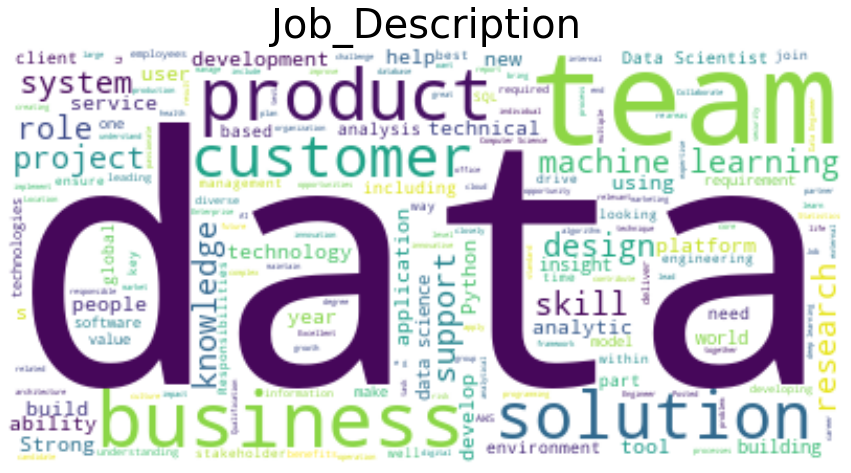

In [22]:
stopwords.update(["use", "Ireland", "ireland", 'take', 'area', 'experience', 'create', 'etc', 'etc.', 'industry', 'benefit', 'performance', 'position',
'across', 'provide', 'employee', 'working', 'work', 'will', 'Dublin','company'])
create_wc(all_details, "Job_Description", max_words=200, max_font_size=100, stopwords=stopwords)

In [23]:
len(stopwords)

213